In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as cl
from matplotlib.colors import LogNorm
import time
import datetime
import re
from utilities import CensusTractFinder
from utilities import AFFData
from utilities import Geometry

In [3]:
fname = 'Car_Break_Ins_Clean_2.csv'
data_poverty = pd.read_csv(fname, quotechar='"')[['CensusTract','poverty']].dropna().as_matrix().astype(str)

In [4]:
aff_data = AFFData()

In [5]:
data_x = []
data_y = []
data = {}
for d in data_poverty:
    census_tract = d[0]
    if float(d[0]) - np.floor(float(d[0])) == 0:
        census_tract = '%.0f'%float(d[0])
    
    population = aff_data.GetPopulationForCensusTract(census_tract)
    
    if census_tract in data:
        val = data[census_tract]
        val[2] += 1
        data[census_tract] = val
    else:
        val = [float(d[1]), population, 1]
        data[census_tract] = val
    #population = aff_data.GetPopulationForCensusTract(census_tract)
    #data_x.append(population)
    #data_y.append(float(d[1]))

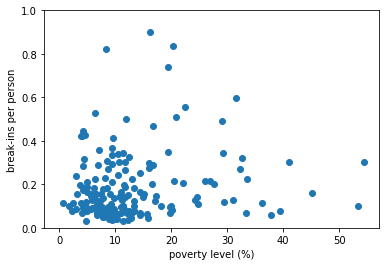

In [7]:
plot_x = []
plot_y = []
for key, val in data.items():
    plot_x.append(val[0])
    plot_y.append(val[2]/val[1])

plt.plot(plot_x, plot_y, marker='o', linestyle='None')

plt.xlabel('poverty level (%)')
plt.ylabel('break-ins per person')

plt.ylim([0,1])

plt.show()